# &#x1F4D1; &nbsp; <span style="color:red"> Reflections. Deep Learning. Lesson 3</span>

##   &#x1F916; &nbsp; <span style="color:red">Links</span>

CS231n Convolutional Neural Networks for Visual Recognition

- Optimization http://cs231n.github.io/optimization-1/
- Intuitive understanding of backpropagation http://cs231n.github.io/optimization-2/
- Neural Network architectures http://cs231n.github.io/neural-networks-1/
- Data Preprocessing, Loss Functions http://cs231n.github.io/neural-networks-2/
- Gradient Check, Sanity Check http://cs231n.github.io/neural-networks-3/
- Convolutional Neural Networks http://cs231n.github.io/convolutional-networks/
- Visualizing Convolutional Neural Networks http://cs231n.github.io/understanding-cnn/
- Transfer Learning http://cs231n.github.io/transfer-learning/

- CS231n Winter 2016: Lecture 4: Backpropagation, Neural Networks 1 https://www.youtube.com/watch?v=i94OvYb6noo&list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC&index=4
- CS231n Winter 2016: Lecture 5: Neural Networks Part 2 https://www.youtube.com/watch?v=gYpoJMlgyXA&t=31s
- CS231n Winter 2016: Lecture 6: Neural Networks Part 3 / Intro to ConvNets https://www.youtube.com/watch?v=hd_KFJ5ktUc
- CS231n Winter 2016: Lecture 7: Convolutional Neural Networks https://www.youtube.com/watch?v=LxfUGhug-iQ
- CS231n Winter 2016: Lecture 11: ConvNets in practice https://www.youtube.com/watch?v=pA4BsUK3oP4&list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC&index=11


Convolutional Neural Networks (LeNet) http://deeplearning.net/tutorial/lenet.html
    
Lecture 14: Convolutional neural networks for computer vision http://learning.eng.cam.ac.uk/pub/Public/Turner/Teaching/ml-lecture-3-slides.pdf

Some Lesser-Known Deep Learning Libraries
http://blog.paralleldots.com/technology/deep-learning/lesser-known-deep-learning-libraries/?utm_content=buffer02038&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer

##   &#x1F916; &nbsp; <span style="color:red">Libraries</span>

In [ ]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
from IPython.display import display, Image

##   &#x1F916; &nbsp; <span style="color:red">CNN Convolutional Neural Networks</span>

### Notes

**Convolutional Neural Networks (CNNs)** have extraordinary good performance on image classification tasks, and they constrain the architecture in a more sensible way. The key idea behind CNNs is to build many layers of feature detectors to take the spatial arrangement of pixels in an input image into account. Unlike a regular Neural Network, the layers of a ConvNet have neurons arranged in 3 dimensions: width, height, depth.

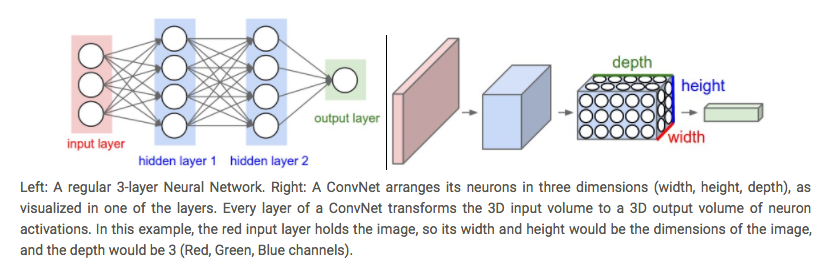

In [3]:
Image("ud730_3_03.png")

- image statistics are translation invariant (objects and viewpoint translates)
  - build this translation invariance into the model (rather than learning it)
  - tie lots of the weights together in the network
  - reduces number of parameters
  
- expect learned low-level features to be local (e.g. edge detector)
  - build this into the model by allowing only local connectivity
  - reduces the numbers of parameters further
  
- expect high-level features learned to be coarser (c.f. biology)
  - build this into the model by subsampling more and more up the hierarchy
  - reduces the number of parameters again

We use three main types of layers to build ConvNet architectures: 

- Convolutional Layer, 
- Pooling Layer, 
- Fully-Connected Layer (exactly as seen in regular Neural Networks).

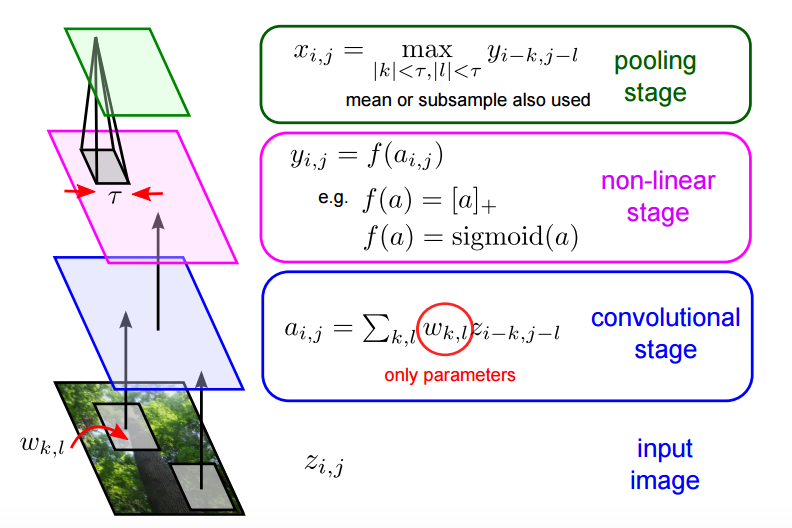

In [7]:
Image("ud730_3_04.png")

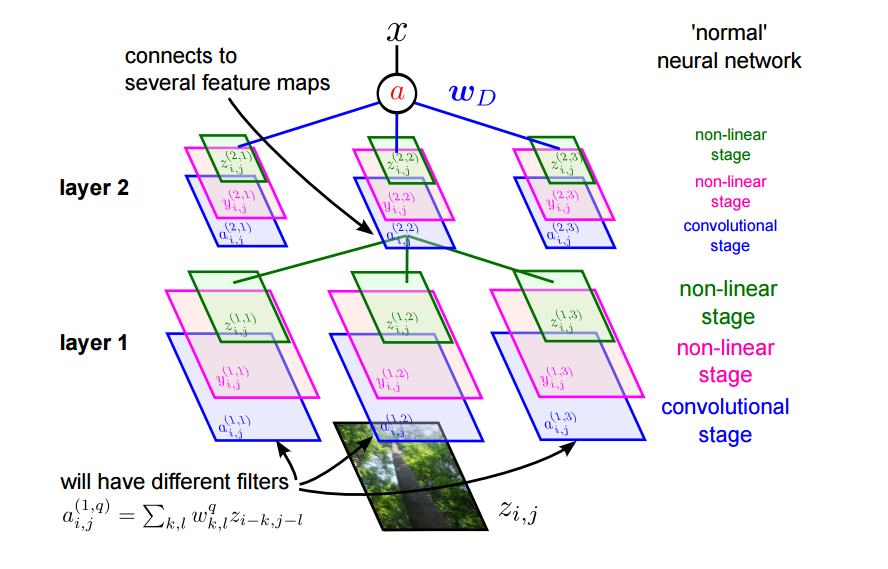

In [8]:
Image("ud730_3_05.png")

- higher level layers encode more abstract features
- higher level layers show more invariance to instantiation parameters
  - translation
  - rotation
  - lighting changes
- a method for learning feature detectors
  - first layer learns edge detectors
  - subsequent layers more complex
  - integrates training of the classifier with training of the featural representation

A simple ConvNet for CIFAR-10 classification could have the architecture [INPUT - CONV - RELU - POOL - FC].

- **INPUT** [32x32x3] will hold the raw pixel values of the image, in this case an image of width 32, height 32, and with three color channels R,G,B.
- **CONV layer** will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. This may result in volume such as [32x32x12] if we decided to use 12 filters.
  - The brain/neuron analogies: every entry in the 3D output volume can also be interpreted as an output of a neuron that looks at only a small region in the input and shares parameters with all neurons to the left and right spatially (since these numbers all result from applying the same filter).
- **RELU layer** will apply an elementwise activation function, such as the max(0,x)max(0,x) thresholding at zero. This leaves the size of the volume unchanged ([32x32x12]).
- **POOL layer** will perform a downsampling operation along the spatial dimensions (width, height), resulting in volume such as [16x16x12].
- **FC (i.e. fully-connected) layer** will compute the class scores, resulting in volume of size [1x1x10], where each of the 10 numbers correspond to a class score, such as among the 10 categories of CIFAR-10. As with ordinary Neural Networks and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.

### Quizes

In [4]:
# Quiz: Color
# (R+G+B)/3

In [11]:
# Quiz: Feature Map Sizes

#       #   S   #   W  #  H  #  D
# same  #   1   #  28  #  28 #  8
# valid #   1   #  26  #  26 #  8
# valid #   2   #  13  #  13 #  8

# SAME padding equation:
# out_height = ceil(float(in_height) / float(strides[1]))
# print(out_height)
# out_width  = ceil(float(in_width) / float(strides[2]))

# VALID padding equation:

# out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
# out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))

##   &#x1F916; &nbsp; <span style="color:red">Assignment 4: Convolutional Models</span>

In [14]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    valid_dataset = save['valid_dataset']
    valid_labels = save['valid_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save  # hint to help gc free up memory
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Validation set', valid_dataset.shape, valid_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


In [15]:
image_size = 28
num_labels = 10
num_channels = 1 # grayscale

import numpy as np

def reformat(dataset, labels):
    dataset = dataset.reshape((-1, image_size, image_size, num_channels)).astype(np.float32)
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels
train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28, 1) (200000, 10)
Validation set (10000, 28, 28, 1) (10000, 10)
Test set (10000, 28, 28, 1) (10000, 10)


In [16]:
def run_test(num_steps):

    with tf.Session(graph=graph) as session:
        tf.global_variables_initializer().run()
        print("Initialized")
        for step in range(num_steps):
            # Pick an offset within the training data, which has been randomized.
            # Note: we could use better randomization across epochs.
            offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
            # Generate a minibatch.
            batch_data = train_dataset[offset:(offset + batch_size), :]
            batch_labels = train_labels[offset:(offset + batch_size), :]
            # Prepare a dictionary telling the session where to feed the minibatch.
            # The key of the dictionary is the placeholder node of the graph to be fed,
            # and the value is the numpy array to feed to it.
            feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
            _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
            if (step % 500 == 0):
                print("Minibatch loss at step %d: %f" % (step, l))
                print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
                print("Validation accuracy: %.1f%%" % accuracy(valid_prediction.eval(), valid_labels))
        print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

In [17]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

In [19]:
batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64

graph = tf.Graph()

with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)
  
    # Variables.
    layer1_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth], stddev=0.1))
    layer1_biases = tf.Variable(tf.zeros([depth]))
    layer2_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, depth, depth], stddev=0.1))
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
    layer3_weights = tf.Variable(tf.truncated_normal([image_size // 4 * image_size // 4 * depth, num_hidden], 
                                                     stddev=0.1))
    layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    layer4_weights = tf.Variable(tf.truncated_normal([num_hidden, num_labels], stddev=0.1))
    layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
    # Model.
    def model(data):
        conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
        
        hidden = tf.nn.relu(conv + layer1_biases)
        
        conv = tf.nn.conv2d(hidden, layer2_weights, [1, 2, 2, 1], padding='SAME')
        
        hidden = tf.nn.relu(conv + layer2_biases)
        
        shape = hidden.get_shape().as_list()
        reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
        
        hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
        
        return tf.matmul(hidden, layer4_weights) + layer4_biases
  
    # Training computation.
    logits = model(tf_train_dataset)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
  
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
    test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [20]:
run_test(3001)

Initialized
Minibatch loss at step 0: 3.462707
Minibatch accuracy: 6.2%
Validation accuracy: 10.0%
Minibatch loss at step 500: 0.791514
Minibatch accuracy: 87.5%
Validation accuracy: 80.9%
Minibatch loss at step 1000: 0.403123
Minibatch accuracy: 81.2%
Validation accuracy: 82.7%
Minibatch loss at step 1500: 0.980623
Minibatch accuracy: 68.8%
Validation accuracy: 84.1%
Minibatch loss at step 2000: 0.169226
Minibatch accuracy: 93.8%
Validation accuracy: 84.6%
Minibatch loss at step 2500: 0.879716
Minibatch accuracy: 75.0%
Validation accuracy: 84.7%
Minibatch loss at step 3000: 0.930340
Minibatch accuracy: 81.2%
Validation accuracy: 85.7%
Test accuracy: 92.2%


Problem 1

The convolutional model above uses convolutions with stride 2 to reduce the dimensionality. Replace the strides by a max pooling operation (nn.max_pool()) of stride 2 and kernel size 2.

Problem 2

Try to get the best performance you can using a convolutional net. Look for example at the classic LeNet5 architecture, adding Dropout, and/or adding learning rate decay.


### Problem 1

In [23]:
batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64

graph = tf.Graph()

with graph.as_default():

    # Input data.
    tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
    tf_valid_dataset = tf.constant(valid_dataset)
    tf_test_dataset = tf.constant(test_dataset)

    # Variables.
    
    # Dimensions for conv weights are: 
    # patch_height x patch_width x #channels x depth
    layer1_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, num_channels, depth], stddev=0.05))
    layer1_biases = tf.Variable(tf.zeros([depth]))
    layer2_weights = tf.Variable(tf.truncated_normal([patch_size, patch_size, depth, depth], stddev=0.05))
    layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
    
    # Divide by 4 here, as images have been halved twice during max pooling steps
    layer3_weights = tf.Variable(tf.truncated_normal([image_size // 4 * image_size // 4 * depth, num_hidden], 
                                                     stddev=0.05))
    layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
    layer4_weights = tf.Variable(tf.truncated_normal([num_hidden, num_labels], stddev=0.05))
    layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
    # Model.
    def model(data):
        conv = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='SAME')
               
        # Max-pooling: stride 2, kernel size 2
        maxpool = tf.nn.max_pool(conv, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')
        
        hidden = tf.nn.relu(maxpool + layer1_biases)
        
        conv = tf.nn.conv2d(hidden, layer2_weights, [1, 1, 1, 1], padding='SAME')
        
        maxpool = tf.nn.max_pool(conv, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')
        
        hidden = tf.nn.relu(maxpool + layer2_biases)
        
        shape = hidden.get_shape().as_list()
        reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
        
        hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
        
        return tf.matmul(hidden, layer4_weights) + layer4_biases

    # Training computation.
    logits = model(tf_train_dataset)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels, logits=logits))
    
    # Optimizer.
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
  
    # Predictions for the training, validation, and test data.
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
    test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [ ]:
run_test(3001)

Initialized
Minibatch loss at step 0: 2.388673
Minibatch accuracy: 6.2%
